# Predict sale price of a home in Ames, IOWA
                                            - Catalina Jaramillo, Saritha Nair and Sashanth Gaddipati

# Table of Contents

**Introduction**

1.     Dataset Description
2.     Preliminary descriptive analysis
3.     Data Cleaning
4.     Correlation between variables
5.     Linear regression model
6.     knn model
7.     Random Forest 
8.     Mean Squared Error
9.     Conclusion



 

# Introduction

Home buying has been a dream for many an American. But the process is laced with lots of unknowns that could jeoparize what could be the largest investment for many families.

In this project we evaluate home buying process that is localized to the town Ames in IOWA. Our goal is to make meaningful inferences from the data collected across multiple years on sale prices. We wish to predict sale price based upon multiple factors involved and hope to guide prospective home buyers and sellers through this journey.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 1. Dataset Description

This dataset includes identifying information about each home, along with the sale price. Factors that determine the sale price are represented in codes e.g.MSSubClass or in plain numbers e.g.LotArea. Please note that the data has been procured from Kaggle.

**Data Source:**  https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data  

## Objective:
**While calculating the final sale price is the sole objective, we wish to show the interplay between various factors so that an informed decision could be made. **

In [2]:
house_data = pd.read_csv('train.csv')
month_df =  pd.read_csv('Month_df.csv')
MSSubClass_df =  pd.read_csv('MSSubClass.csv')



## 2. Preliminary descriptive analysis

In [3]:
house_data.shape

(1460, 81)

In [4]:
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
#set Id as index
house_data.set_index('Id', inplace = True)

In [6]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

## 3. Data cleaning



Multiple data anomalies were observed in the data furished by Kaggle. Our analysis showed multiple columns with blank values, under representation of data points, data points skewed to right and so on. We have also assumed liberties to drop columns that have near empty data.



Creating a deep copy of the data and then cleaning the copy.

In [7]:
clean_house_data = house_data.copy(deep=True)

## 3.1 . Cleaning NULL values

Following code checks on selected columns to see how many of the rows are **missing values.**

In [8]:
# There following variables have hogh count of null values for a very low percentage of valid observations
print
(
clean_house_data.PoolQC.count()/len(clean_house_data),
clean_house_data.Fence.count()/len(clean_house_data),
clean_house_data.MiscFeature.count()/len(clean_house_data)

)


(0.0047945205479452057, 0.19246575342465752, 0.036986301369863014)

## 3.2 . Cleaning columns with zeroes

Following code checkd on selected columns to see how many of the rows have **zeroes** for the columns.

In [9]:
# check percentage of rows that have zeroes for 3SsnPorch, EnclosedPorch, MiscVal
(np.sum(clean_house_data['3SsnPorch']!=0)/len(clean_house_data),
np.sum(clean_house_data['EnclosedPorch']!=0)/len(clean_house_data),
np.sum(clean_house_data['MiscVal']!=0)/len(clean_house_data),
np.sum(clean_house_data['PoolArea']!=0)/len(clean_house_data))

(0.01643835616438356,
 0.14246575342465753,
 0.035616438356164383,
 0.0047945205479452057)

Both the previous calculations put forward a strong case for dropping the selected columns 

In [10]:
# As we are dropping value of Miscellaneous feature (MiscVal) for lack of data, we are also dropping miscellaneous feature MiscFeature

clean_house_data.drop(['PoolQC','Fence', 'MiscVal','3SsnPorch','EnclosedPorch','MiscVal','PoolArea','MiscFeature'],  axis = 1, inplace = True) 

## 3.3 . Replacing NA with valid values

We have observed that **NA** in some of the columns actually has a significance. It was being wrongly interpreted by PANDAS as null . So we are replacing NA in such columns with meaningul values. 

In [11]:
# Change Alley NaN to "NoAlleyAccess". For this variable, NA is not missing data. 
clean_house_data.Alley.fillna(value = 'NoAlleyAccess', inplace = True)
clean_house_data.KitchenQual.fillna(value = 'None', inplace = True)
clean_house_data.ExterQual.fillna(value = 'None', inplace = True)
clean_house_data.ExterCond.fillna(value = 'None', inplace = True)
clean_house_data.BsmtQual.fillna(value = 'None', inplace = True)
clean_house_data.BsmtCond.fillna(value = 'None', inplace = True)
clean_house_data.GarageQual.fillna(value = 'None', inplace = True)
clean_house_data.GarageCond.fillna(value = 'None', inplace = True)
clean_house_data.HeatingQC.fillna(value = 'None', inplace = True)
clean_house_data.BsmtFinType1.fillna(value = 'None', inplace = True)
clean_house_data.BsmtFinType2.fillna(value = 'None', inplace = True)
clean_house_data.BsmtExposure.fillna(value = 'None', inplace = True)
clean_house_data.FireplaceQu.fillna(value = 'NoFireplace', inplace = True)

## 3.4. Cleaning under represented values

We have observed that multiple values are under represented in various columns. We have taken the liberties of merging such values into values of higher frequencies. We have relied on our knowledge of residentail real estate to make such decisions. 

## 3.4.1. Lot Shape

We have merged both the under represented **irregular lot types** into the macro type of irregularity

In [12]:

clean_house_data.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [13]:
# convert IR2 and IR3 into IR1.
LstIrregular = ['IR2','IR3']
clean_house_data.LotShape[clean_house_data.LotShape.isin(LstIrregular)] = 'IR1'

## 3.4.2. Lot configuration

We have merged both the under represented **frontage types in lot configurations** into the the type corner under the assumption that corner plots
have frontage on atleast two side.

In [14]:
clean_house_data.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [15]:

LstFrontage = ['FR2','FR3']
clean_house_data.LotConfig[clean_house_data.LotConfig.isin(LstFrontage)] = 'Corner'

## 3.4.3. Heating

We have merged all the **heating types** into **GasA** as the other values were extremely under represented when compared to GasA.

In [16]:
clean_house_data.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [17]:


clean_house_data.Heating[clean_house_data.Heating!='GasA'] = 'GasA'

## 3.4.4. Utilities

We have merged all the utility type **NoSeWa ( No sewage and water) ** into **AllPub ( All public utilites)** as there was just once instance of it.

In [18]:
clean_house_data.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [19]:
clean_house_data.Utilities[clean_house_data.Utilities!='AllPub'] = 'AllPub'

## 3.4.5. Exterior finish type

We have merged all the under represented **exterior finish types** into **Wooden Shingles** for a much more broader classification.

In [20]:
clean_house_data.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
CBlock       1
ImStucc      1
AsphShn      1
Name: Exterior1st, dtype: int64

In [21]:

LstExt1st = ['Stucco','AsbShng','BrkComm','Stone','CBlock','AsphShn','ImStucc']
clean_house_data.Exterior1st[clean_house_data.Exterior1st.isin(LstExt1st)] = 'WdShing'

In [22]:
clean_house_data.Exterior2nd.value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [23]:
# Merging 2nd floor exteriors to create broader categories
LstExt2nd = ['Stucco','AsbShng','BrkComm','Stone','CBlock','AsphShn','ImStucc','Brk Cmn','Other']
clean_house_data.Exterior2nd[clean_house_data.Exterior2nd.isin(LstExt2nd)] = 'WdShing'

## 3.5. Filling missing values

It was observed that some properties were missing values for the field **LotFrontage**. We have filled such values by ** mean** of lot frontage in the neighborhoods such properties are located.


In [24]:
# Calculate the average lot frontage for each neighborhood
clean_house_data.loc[:,['LotFrontage']].groupby(clean_house_data.Neighborhood).agg('mean')

,LotFrontage
Neighborhood,
Blmngtn,47.142857
Blueste,24.000000
BrDale,21.562500
BrkSide,57.509804
ClearCr,83.461538
CollgCr,71.682540
Crawfor,71.804878
Edwards,68.217391
Gilbert,79.877551


In [25]:
# Fill NaN values in LotFrontage using mean of the same column with in the same neighborhood

clean_house_data.LotFrontage.fillna(value = clean_house_data.loc[:,['LotFrontage']].
                                    groupby(clean_house_data.Neighborhood).
                                    transform('mean').LotFrontage, 
                                    inplace = True)

## 3.6. Converting qualitative values to quantitative values

We have observed multiple columns that were **qualitative**. But the values in such columns have assumed a hierachial value structure. So we have prepared **scales** to convert qualitative values into quantitative for easier computation.

In [26]:

scale1 = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0}

In [27]:
clean_house_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [28]:
# Replace values for aplicable variables:

to_scale1 = ['KitchenQual', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'HeatingQC']

clean_house_data.loc[:,to_scale1] = clean_house_data.loc[:,to_scale1].replace(scale1)


In [29]:
# We need another scale for the kind of finishing in the basement
scale2 = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'None':0}

In [30]:
#Replace values
to_scale2 = ['BsmtFinType1', 'BsmtFinType2']

clean_house_data.loc[:,to_scale2] = clean_house_data.loc[:,to_scale2].replace(scale2)

In [31]:
#Basement exposure has a different scale
clean_house_data.BsmtExposure = clean_house_data.BsmtExposure.replace({'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'None':0})

In [32]:
#Land Slope has another scale
clean_house_data.LandSlope = clean_house_data.LandSlope.replace({'Gtl':2, 'Mod':1, 'Sev':0})

In [33]:
clean_house_data.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.000000,8450,Pave,NoAlleyAccess,Reg,Lvl,AllPub,Inside,...,3,Y,0,61,0,2,2008,WD,Normal,208500
2,20,RL,80.000000,9600,Pave,NoAlleyAccess,Reg,Lvl,AllPub,Corner,...,3,Y,298,0,0,5,2007,WD,Normal,181500
3,60,RL,68.000000,11250,Pave,NoAlleyAccess,IR1,Lvl,AllPub,Inside,...,3,Y,0,42,0,9,2008,WD,Normal,223500
4,70,RL,60.000000,9550,Pave,NoAlleyAccess,IR1,Lvl,AllPub,Corner,...,3,Y,0,35,0,2,2006,WD,Abnorml,140000
5,60,RL,84.000000,14260,Pave,NoAlleyAccess,IR1,Lvl,AllPub,Corner,...,3,Y,192,84,0,12,2008,WD,Normal,250000
6,50,RL,85.000000,14115,Pave,NoAlleyAccess,IR1,Lvl,AllPub,Inside,...,3,Y,40,30,0,10,2009,WD,Normal,143000
7,20,RL,75.000000,10084,Pave,NoAlleyAccess,Reg,Lvl,AllPub,Inside,...,3,Y,255,57,0,8,2007,WD,Normal,307000
8,60,RL,81.288889,10382,Pave,NoAlleyAccess,IR1,Lvl,AllPub,Corner,...,3,Y,235,204,0,11,2009,WD,Normal,200000
9,50,RM,51.000000,6120,Pave,NoAlleyAccess,Reg,Lvl,AllPub,Inside,...,3,Y,90,0,0,4,2008,WD,Abnorml,129900


In [34]:
# Dataframe for months 

month_df

,Month_num,Month_name
0,1,Jan
1,2,Feb
2,3,Mar
3,4,Apr
4,5,May
5,6,Jun
6,7,Jul
7,8,Aug
8,9,Sep
9,10,Oct


## 3.7. Trend of sales by month

Checking the average sale price per each month across the years for under representation.

In [35]:
house_data_bymonth = clean_house_data[['MoSold','SalePrice','YrSold']].merge(month_df.rename(columns={'Month_num':'MoSold'}),
                                            on='MoSold',
                                           how='inner')

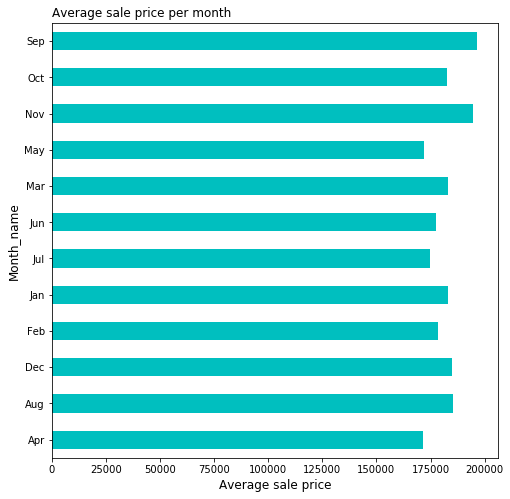

In [36]:
%matplotlib inline
fig, ax = plt.subplots()
ax.set_title('Average sale price per month', loc='left')
ax.set_xlabel("Average sale price", fontsize=12)
ax.set_ylabel("Month",fontsize=12)
house_data_bymonth.pivot_table(index='Month_name',columns='YrSold',values='SalePrice').mean(1).rename(columns={'Month_name':'Month'}).plot(kind='barh', ax=ax,figsize = (8,8),color='c',x='Month')

Checking the number of homes sold per each month for under representation.

In [37]:
 house_data_bymonth['countbymonth'] =  house_data_bymonth.groupby('Month_name')['MoSold'].transform(len)

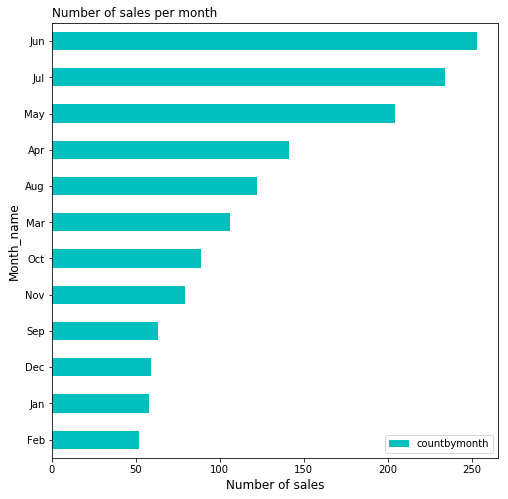

In [38]:
fig, ax = plt.subplots()
ax.set_title('Number of sales per month', loc='left')
ax.set_xlabel("Number of sales", fontsize=12)
ax.set_ylabel("Month",fontsize=12)

house_data_bymonth.drop_duplicates(['Month_name','countbymonth'])[['Month_name','countbymonth']].set_index('Month_name').sort_values('countbymonth').plot(kind='barh', ax=ax,figsize = (8,8),color='c')


## 3.8. Dropping columns as per analysis

We have dropped fields that we assumed would not contribute to sale price in any form.

In [39]:
# drop LandSlope and LandContour as we think they do not affect property prices.
clean_house_data.drop(['LandSlope'], axis=1, inplace=True)
clean_house_data.drop(['LandContour'], axis=1, inplace=True)

## 3.9. Data normalization

We have also **transformed** some variables that were either heavily skewed or their scales were too large or too small to fit in regression models.

In [40]:
clean_house_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPo

## 3.9.1. Total Basement square footage

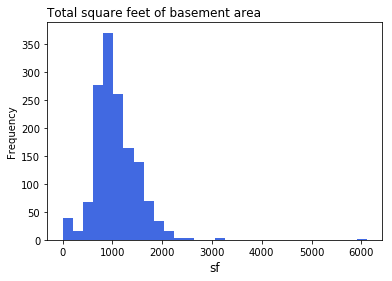

In [41]:
# Plot TotalBsmtSF to check if it is skewed

fig, ax = plt.subplots()
ax.set_title('Total square feet of basement area', loc='left')
ax.set_xlabel("sf", fontsize=12)

clean_house_data['TotalBsmtSF'].\
plot(kind='hist', bins = 30, ax=ax,figsize = (6,4),color='royalblue')


As seen above, **Total basement square footage ** is heavily skewed to the right. So we are using natural log values to counter for that.

In [42]:
# Changing to log to counter right skew. Adding a nominal value 1 to counter for zeroes
clean_house_data['TotalBsmtSF']=np.log(clean_house_data.TotalBsmtSF+1) 

## 3.9.2. Sale Price

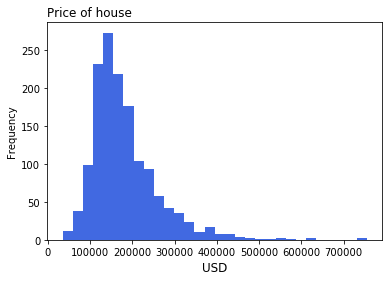

In [43]:
# Plot 'SalePrice' to check if it is skewed

fig, ax = plt.subplots()
ax.set_title('Price of house', loc='left')
ax.set_xlabel("USD", fontsize=12)


clean_house_data['SalePrice'].\
plot(kind='hist', bins = 30, ax=ax,figsize = (6,4),color='royalblue')



As seen above, **Sale Price ** is heavily skewed to the right. So we are using natural log values to counter for that.

In [44]:

# Apply log on sale price as sale price is right skewed
clean_house_data['SalePrice']=np.log(clean_house_data['SalePrice']) 

## 3.9.3. Lot Area

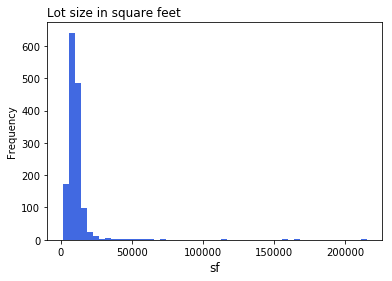

In [45]:
# Plot 'LotArea' to check if it is skewed

fig, ax = plt.subplots()
ax.set_title('Lot size in square feet', loc='left')
ax.set_xlabel("sf", fontsize=12)

clean_house_data['LotArea'].\
plot(kind='hist', bins = 50, ax=ax,figsize = (6,4),color='royalblue')

As seen above, **Lot Area ** is heavily skewed to the right. So we are using natural log values to counter for that.

In [46]:
# 'LotArea' is skewed . So normalize it using log 
clean_house_data['LotArea']=np.log(clean_house_data.LotArea) 

## 3.9.4. First floor square footage

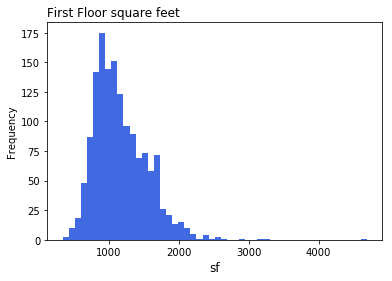

In [47]:
# Plot '1stFlrSF' to check if it is skewed

fig, ax = plt.subplots()
ax.set_title('First Floor square feet', loc='left')
ax.set_xlabel("sf", fontsize=12)

clean_house_data['1stFlrSF'].\
plot(kind='hist', bins = 50, ax=ax,figsize = (6,4),color='royalblue')

As seen above, **Square footage of first floor** is heavily skewed to the right. So we are using natural log values to counter for that.

In [48]:
# 1st Floor Area is skewed . So normalize it using log 
clean_house_data['1stFlrSF']=np.log(clean_house_data['1stFlrSF']+1) 

## 3.9.5. Second floor square footage

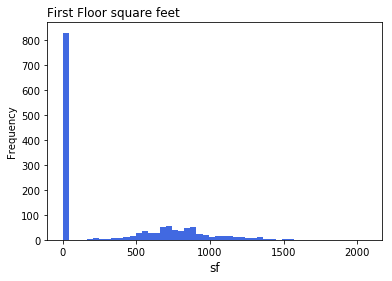

In [49]:
# Plot '2ndFlrSF' to check if it is skewed

fig, ax = plt.subplots()
ax.set_title('First Floor square feet', loc='left')
ax.set_xlabel("sf", fontsize=12)

clean_house_data['2ndFlrSF'].\
plot(kind='hist', bins = 50, ax=ax,figsize = (6,4),color='royalblue')

As seen above, **Square footage of second floor** is heavily skewed to the right. So we are using natural log values to counter for that.

In [50]:
# '2ndFlrSF' is skewed . Normalizing using log after adding a nomincal value 1
clean_house_data['2ndFlrSF']=np.log(clean_house_data['2ndFlrSF']+1) 

## 3.8.6. Total square footage above ground

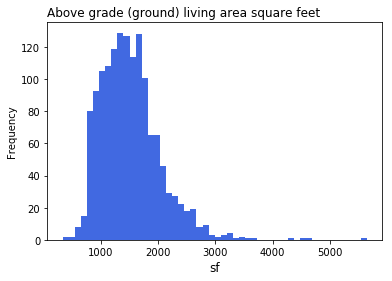

In [51]:
# Plot 'GrLivArea' to check if it is skewed

fig, ax = plt.subplots()
ax.set_title('Above grade (ground) living area square feet', loc='left')
ax.set_xlabel("sf", fontsize=12)

clean_house_data['GrLivArea'].\
plot(kind='hist', bins = 50, ax=ax,figsize = (6,4),color='royalblue')


In [52]:
# 'GrLivArea' is skewed . NOrmalizing using log after adding a nominal value 1 to account for zeroes
clean_house_data['GrLivArea']=np.log(clean_house_data.GrLivArea+1) 

## 3.9.7. Squre footage of the wooden deck

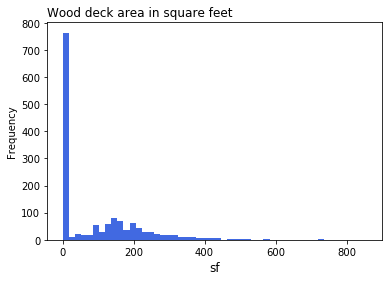

In [53]:
# Plot 'WoodDeckSF' to check if it is skewed

fig, ax = plt.subplots()
ax.set_title('Wood deck area in square feet', loc='left')
ax.set_xlabel("sf", fontsize=12)

clean_house_data['WoodDeckSF'].\
plot(kind='hist', bins = 50, ax=ax,figsize = (6,4),color='royalblue')

As seen above, **Wooden deck square footage** is heavily skewed to the right. So we are using natural log values to counter for that.

In [54]:
# 'WoodDeckSF' is skewed . NOrmalizing using log after adding a nominal value 1 to account for zeroes
clean_house_data['WoodDeckSF']=np.log(clean_house_data.WoodDeckSF+1) 

In [55]:
clean_house_data.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,LotConfig,Neighborhood,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,9.041922,Pave,NoAlleyAccess,Reg,AllPub,Inside,CollgCr,...,3,Y,0.000000,61,0,2,2008,WD,Normal,12.247694
2,20,RL,80.0,9.169518,Pave,NoAlleyAccess,Reg,AllPub,Corner,Veenker,...,3,Y,5.700444,0,0,5,2007,WD,Normal,12.109011
3,60,RL,68.0,9.328123,Pave,NoAlleyAccess,IR1,AllPub,Inside,CollgCr,...,3,Y,0.000000,42,0,9,2008,WD,Normal,12.317167
4,70,RL,60.0,9.164296,Pave,NoAlleyAccess,IR1,AllPub,Corner,Crawfor,...,3,Y,0.000000,35,0,2,2006,WD,Abnorml,11.849398
5,60,RL,84.0,9.565214,Pave,NoAlleyAccess,IR1,AllPub,Corner,NoRidge,...,3,Y,5.262690,84,0,12,2008,WD,Normal,12.429216


## 4. Correlation between variables

Preliminary correlation between variables and price allows to understand how the values relate with the output

In [56]:
from scipy.stats import pearsonr

for i in clean_house_data.corr().loc['SalePrice'].index:
    print(
    i, pearsonr( clean_house_data.loc[:,i], clean_house_data.iloc[:,-1])
    )

MSSubClass (-0.073959017332396959, 0.0046924372212045493)
LotFrontage (0.35274673581812471, 5.0165789600638505e-44)
LotArea (0.39991774112559031, 3.4742941763938465e-57)
OverallQual (0.81718441792168339, 0.0)
OverallCond (-0.036867987730284081, 0.15913227518276887)
YearBuilt (0.58657024038422667, 1.1035673374164091e-135)
YearRemodAdd (0.56560783259117942, 3.2114809538339705e-124)
MasVnrArea (nan, 1.0)
ExterQual (0.67883983486430843, 8.3123909030191733e-198)
ExterCond (0.049313632150477127, 0.059591558553112232)
BsmtQual (0.6158036106313125, 3.8429974683800526e-153)
BsmtCond (0.27454303331126767, 1.1671613880434785e-26)
BsmtExposure (0.35742109703492597, 3.1054870437610531e-45)
BsmtFinType1 (0.33480257517081041, 1.4218367009359276e-39)
BsmtFinSF1 (0.3720230735670883, 3.845951043382083e-49)
BsmtFinType2 (0.014034128493952405, 0.59208960114162501)
BsmtFinSF2 (0.0048324105320466494, 0.85362979731448019)
BsmtUnfSF (0.22198505352520975, 9.3185271773124899e-18)
TotalBsmtSF (0.3728378574581569

The results show that **OverallCond, MasVnrArea, BsmtFinType2, BsmtFinSF2, LowQualFinSF, BsmtHalfBath, GarageYrBlt, YrSold** have low significance in the final price of the houses

Now we can see the graphics for the relationship between the significant variables

In [57]:
pares = [
'MSSubClass',
'LotFrontage',
'LotArea',
'OverallQual',
'YearBuilt',
'YearRemodAdd',
'ExterQual',
'ExterCond',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinSF1',
'BsmtUnfSF',
'TotalBsmtSF',
'HeatingQC',
'1stFlrSF',
'2ndFlrSF',
'GrLivArea',
'BsmtFullBath',
'FullBath',
'HalfBath',
'BedroomAbvGr',
'KitchenAbvGr',
'KitchenQual',
'TotRmsAbvGrd',
'Fireplaces',
'GarageCars',
'GarageArea',
'GarageQual',
'GarageCond',
'WoodDeckSF',
'OpenPorchSF',
'ScreenPorch',
'MoSold']

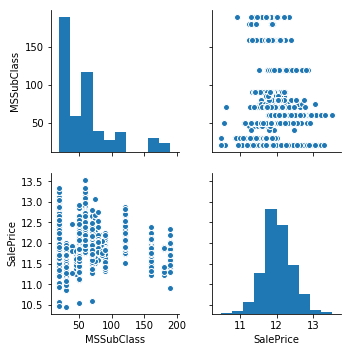

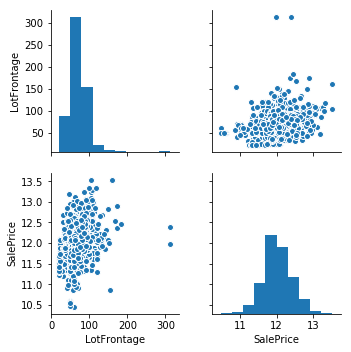

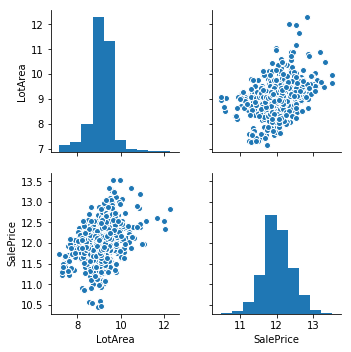

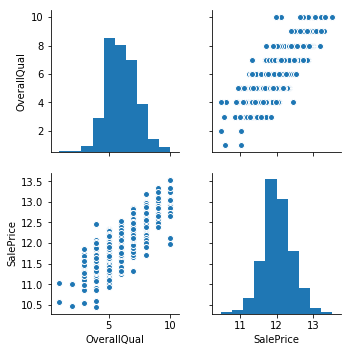

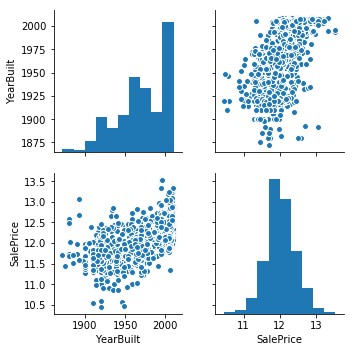

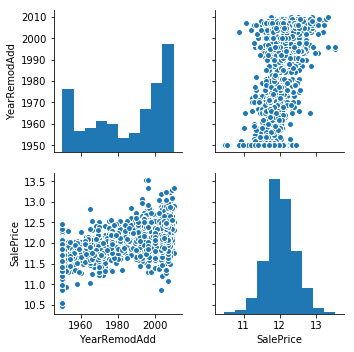

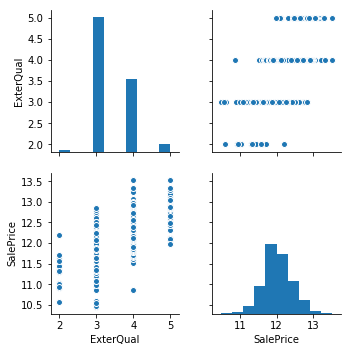

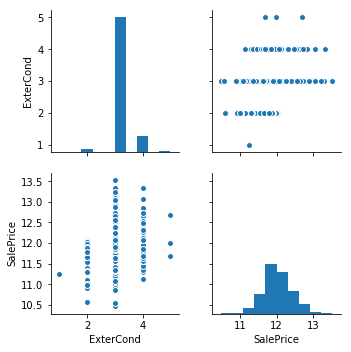

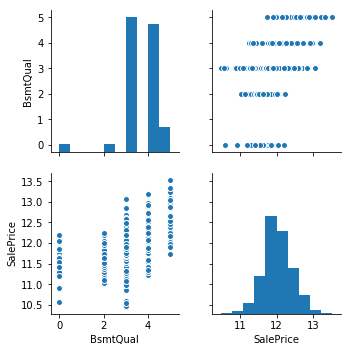

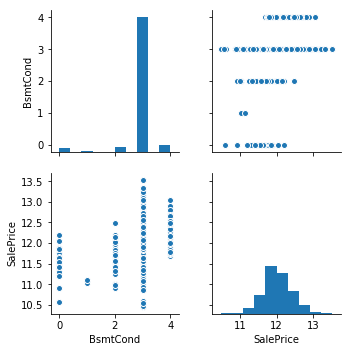

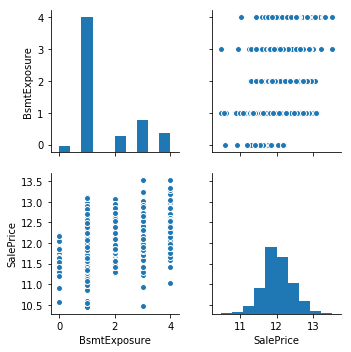

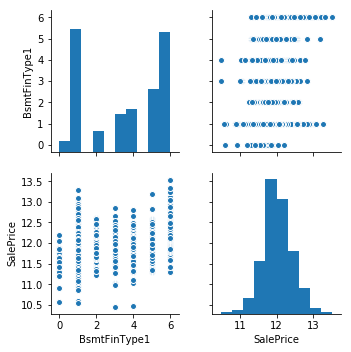

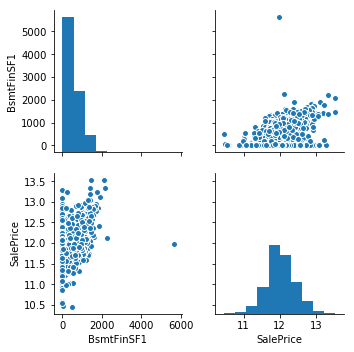

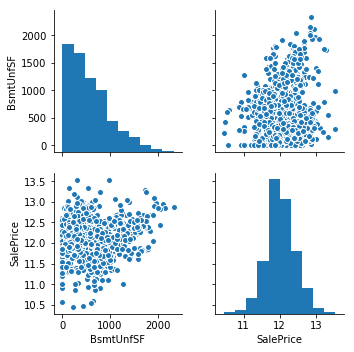

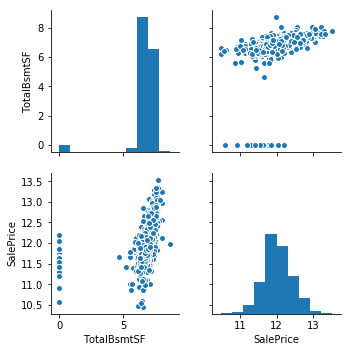

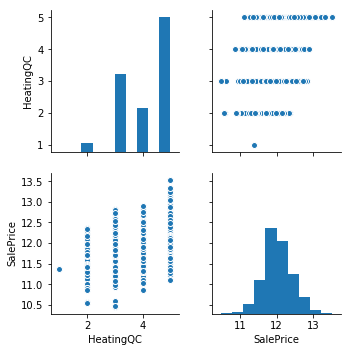

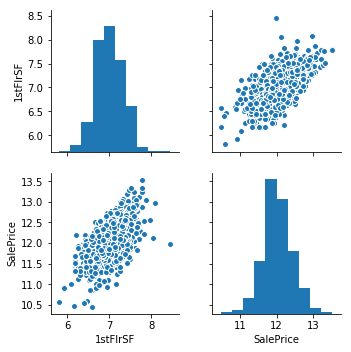

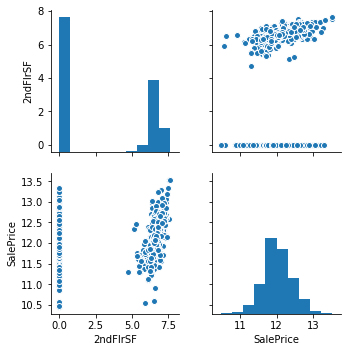

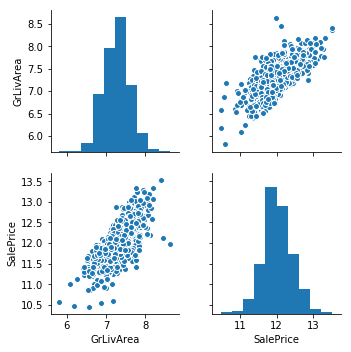

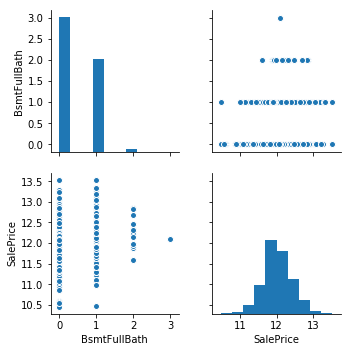

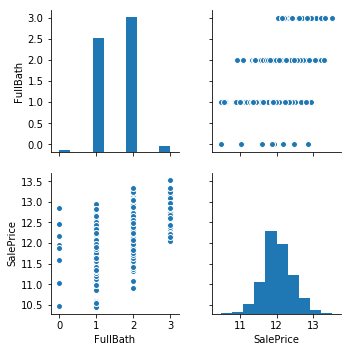

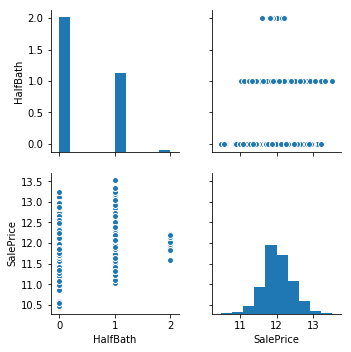

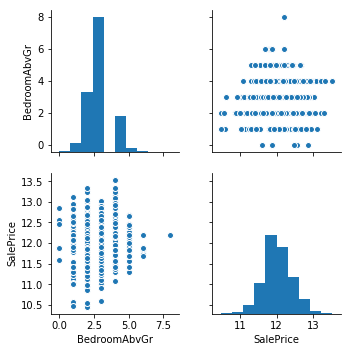

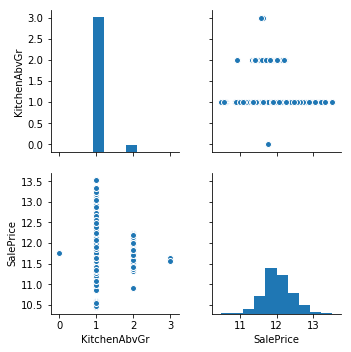

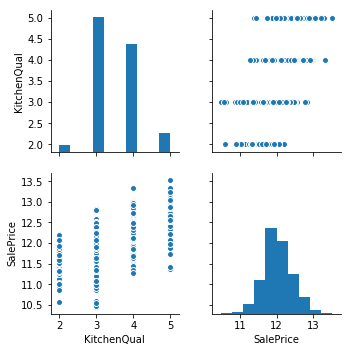

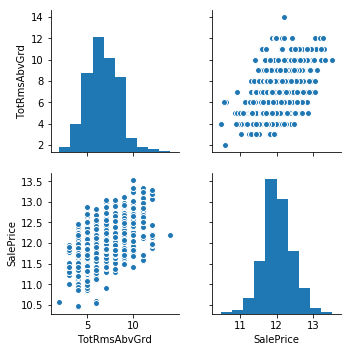

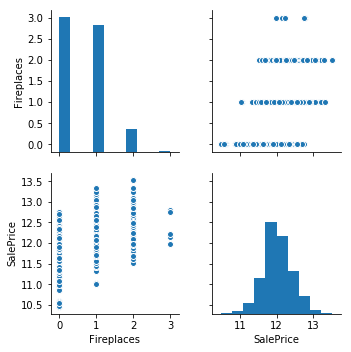

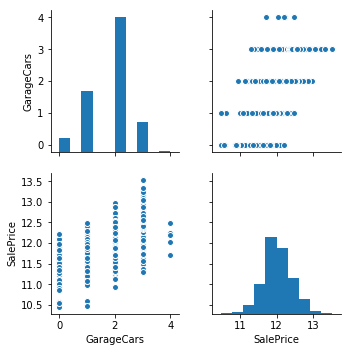

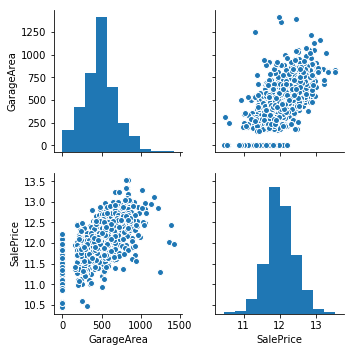

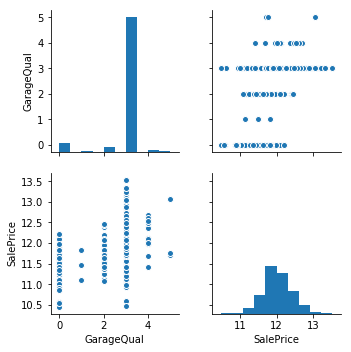

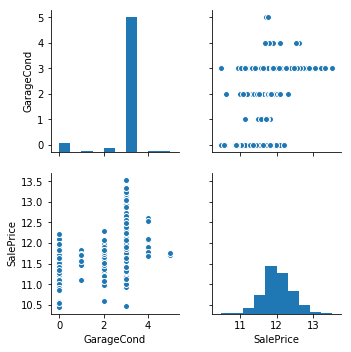

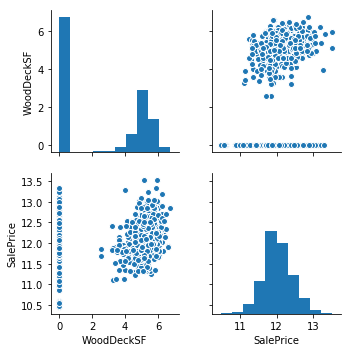

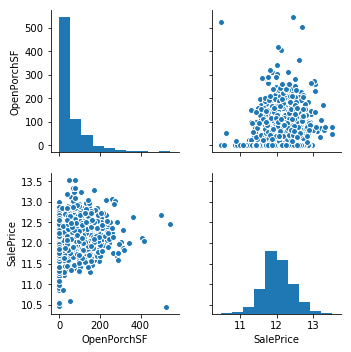

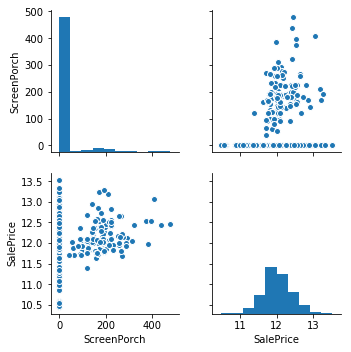

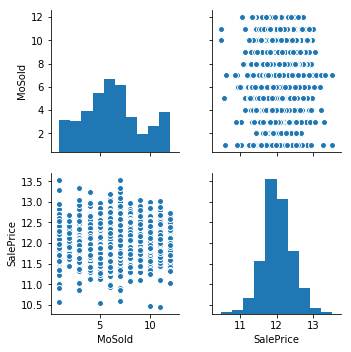

In [58]:
import seaborn as sns
for i in pares:
    sns.pairplot(clean_house_data.loc[:, [i,'SalePrice']])

## 5. Linear regression model

In [59]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as reg
import patsy
from sklearn.model_selection import cross_val_score


We have handpicked variables that have lots of impact on sale price of a home generally. These include the **LotArea, Neighborhood, Type of the building (BldgType), style of the house(HouseStyle), Overall quality of the home(OverallQual), Overall condition of the home(OverallCond),  the year home is built(YearBuilt), total livable area above ground (GrLivArea), number of bedrooms (BedroomAbvGr), number of bathrooms (FullBath),  quality of the kitchen(KitchenQual), number of cars that could fit into the garage(GarageCars) and the total area of the basement(TotalBsmtSF).**

In [60]:
y,X = patsy.dmatrices('SalePrice ~  LotArea+ Neighborhood + BldgType+ HouseStyle + OverallQual+ OverallCond + YearBuilt+ GrLivArea + BedroomAbvGr + FullBath + KitchenQual + GarageCars + TotalBsmtSF', data=clean_house_data)

In [61]:
reg().fit(X,y).score(X,y)

0.89284194464530475

In [62]:
reg().fit(X,y).predict(X)

array([[ 12.22427295],
       [ 12.22781122],
       [ 12.26684626],
       ..., 
       [ 12.47913305],
       [ 11.79349303],
       [ 11.81404967]])

It is evident that R squared is very high. But we should cross validate the data to ensure high R2 is not result of over fitting

In [63]:
cross_val_score(reg(),X,y,cv=5).mean()


0.88458611232493856

In [64]:
cross_val_score(reg(),X,y,cv=10).mean()

0.88368917089800036

In [65]:
cross_val_score(reg(),X,y,cv=15).mean()

0.88348558581968639

It is evident from the various cross validations run on the data that R squared does not change by much.

## 6. KNN model

In [66]:
from sklearn.neighbors import KNeighborsRegressor as knn

The K nearest neighbors model for regression picks the specified number of closest training examples. We have run the model using various values for the neighbors' parameter to pick the one with best R2 value.

In [67]:
cross_val_score(knn(),X,np.ravel(y),cv=5).mean()

0.75126942840037281

In [68]:
cross_val_score(knn(30),X,np.ravel(y),cv=5).mean()

0.65038370989094174

In [69]:
cross_val_score(knn(70),X,np.ravel(y),cv=5).mean()

0.55764521624299135

In [70]:
for i in range(5,100,5):
    print(i,cross_val_score(knn(i),X,np.ravel(y),cv=5).mean())

5 0.7512694284
10 0.722755440297
15 0.701743885822
20 0.682890251677
25 0.666126344272
30 0.650383709891
35 0.633354090215
40 0.618531106877
45 0.604796467146
50 0.593265042672
55 0.582988141107
60 0.574850219933
65 0.565690855774
70 0.557645216243
75 0.549434781458
80 0.54284139965
85 0.536495922437
90 0.530902562361
95 0.524575102826


From the various cross validations and values for K neighbors run on the data , it has been observed that R squared is high when the model is complex with 5 neighbors.

## 7. Random Forest model

In [71]:
from sklearn.ensemble import RandomForestRegressor as rf

The Random decision forests model creates decision trees on the training data as per the values of parameters . We have run the model using various values for the number of estimators and maximum depth of each tree so that we could pick the one with best R2 value.

In [72]:
cross_val_score(rf(n_estimators=50),X,np.ravel(y),cv=5).mean()

0.8585037700217697

In [73]:
np.ravel(y)

array([ 12.24769432,  12.10901093,  12.31716669, ...,  12.49312952,
        11.86446223,  11.90158345])

In [74]:
cross_val_score(rf(),X,np.ravel(y),cv=5).mean()

0.84780923237849515

In [75]:
cross_val_score(rf(max_depth=5),X,np.ravel(y),cv=5).mean()

0.81834600571756178

In [76]:
cross_val_score(rf(max_depth=10),X,np.ravel(y),cv=5).mean()

0.84826730715492216

In [77]:
cross_val_score(rf(max_depth=2),X,np.ravel(y),cv=5).mean()

0.65479641052452975

In [78]:
for i in range(1,10):
    print(i,cross_val_score(rf(n_estimators=200,max_depth=i),X,np.ravel(y),cv=5).mean())

1 0.457583081997
2 0.653830929601
3 0.752416233628
4 0.800349641337
5 0.826513706164
6 0.843528367776
7 0.851860151212
8 0.857733710645
9 0.861905999225


From the various cross validations and values for number of estimators and depth of trees, it has been observed that R squared is high when the model has 9 for maximum depth of each tree.

In [79]:
rf().fit(X,y).score(X,y)

0.97335321402441144

In [80]:
clean_house_data['yhat_price_rf'] = rf(max_depth=9).fit(X,y).predict(X)


In [81]:
clean_house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,LotConfig,Neighborhood,...,PavedDrive,WoodDeckSF,OpenPorchSF,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice,yhat_price_rf
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,9.041922,Pave,NoAlleyAccess,Reg,AllPub,Inside,CollgCr,...,Y,0.000000,61,0,2,2008,WD,Normal,12.247694,12.188719
2,20,RL,80.0,9.169518,Pave,NoAlleyAccess,Reg,AllPub,Corner,Veenker,...,Y,5.700444,0,0,5,2007,WD,Normal,12.109011,12.012277
3,60,RL,68.0,9.328123,Pave,NoAlleyAccess,IR1,AllPub,Inside,CollgCr,...,Y,0.000000,42,0,9,2008,WD,Normal,12.317167,12.244418
4,70,RL,60.0,9.164296,Pave,NoAlleyAccess,IR1,AllPub,Corner,Crawfor,...,Y,0.000000,35,0,2,2006,WD,Abnorml,11.849398,12.074478
5,60,RL,84.0,9.565214,Pave,NoAlleyAccess,IR1,AllPub,Corner,NoRidge,...,Y,5.262690,84,0,12,2008,WD,Normal,12.429216,12.544385


## 8. Model validation by virtue of Mean Squared Error

Our problem is a prediction problem, where we need to find the value of a continuous variable (Price of the houses). In this case, the Mean Squared Error (MSE) provides a measure of how close is the result of the model to the actual value

In [82]:
from sklearn import metrics

In [83]:
# For our Linear Regression Model
print(
    metrics.mean_squared_error(
        clean_house_data.SalePrice,
        reg().fit(X,y).predict(X)
    )
)

0.0170866204812


In [84]:
# For our KNN model
print(
    metrics.mean_squared_error(
        clean_house_data.SalePrice,
        knn(n_neighbors=5).fit(X,np.ravel(y)).predict(X)
    )
)

0.0242387618024


In [85]:
# For our Random Forest
print(
    metrics.mean_squared_error(
        clean_house_data.SalePrice,
        clean_house_data.yhat_price_rf
    )
)

0.00745269982404


## 9. Conclusion

The objective to pick a right model hinges on one that minimizes the error (that is, the predicted value is closer to the actual price). After thorough analysis and running 3 different techniques and finally using MSE, we find the random forest to be the best predictor of sale price. The calculated values of sale price could be found in the column clean_house_data['yhat_price_rf'].